In [1]:
import wfdb 
from wfdb import processing
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import sys 
import os 
import pandas as pd

In [2]:
sys.path.insert(0, '..')
import src.preprocessing.ecg_preprocessing as pf 

In [3]:
WINDOW_LENGTH=10
path = '../data/mitdb/'
dataset_list, descriptions = pf.parse_all_records(path, window_length=WINDOW_LENGTH)
SAMPLING_FREQ = descriptions['channel'].shape[0]/WINDOW_LENGTH

Processing 1 out of 20
Processing 2 out of 20


/usr/local/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)


Processing 3 out of 20
Processing 4 out of 20
Processing 5 out of 20
Processing 6 out of 20
Processing 7 out of 20
Processing 8 out of 20
Processing 9 out of 20
Processing 10 out of 20
Processing 11 out of 20
Processing 12 out of 20
Processing 13 out of 20
Processing 14 out of 20
Processing 15 out of 20
Processing 16 out of 20
Processing 17 out of 20
Processing 18 out of 20
Processing 19 out of 20
Processing 20 out of 20


In [4]:
import pickle

with open('data_ecg.pkl', 'wb') as f:
    pickle.dump(dataset_list, f)

with open('desc_ecg.pkl', 'wb') as f:
    pickle.dump(descriptions, f)

In [4]:
data_df = pf.build_dataset(np.vstack(dataset_list), descriptions, SAMPLING_FREQ)



In [8]:
data_df.corr()

,mean_R_R,std_R_R,root_mean_diff_R_R,mean_hrt_rate,std_hrt_rate,mean,std,minimum,maximum,kurtosis,...,mean_mp,std_mp,minimum_mp,maximum_mp,kurtosis_mp,skew_mp,age,gender,label,file_idx
mean_R_R,1.000000,0.255245,0.991555,-0.893530,-0.149720,-0.177238,-0.101598,-0.075221,-0.006824,0.361375,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.064326,0.205408,0.043704,0.137312
std_R_R,0.255245,1.000000,0.362565,0.039283,0.739217,-0.009194,0.064388,-0.114375,0.129315,-0.048295,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.086722,0.043338,-0.153189,-0.131095
root_mean_diff_R_R,0.991555,0.362565,1.000000,-0.853427,-0.072875,-0.175391,-0.086093,-0.085583,0.003273,0.340859,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.065900,0.201835,0.034801,0.122573
mean_hrt_rate,-0.893530,0.039283,-0.853427,1.000000,0.444284,0.170957,0.070761,0.078771,-0.001120,-0.317910,...,NaN,NaN,NaN,NaN,NaN,NaN,0.109615,-0.154168,-0.066501,-0.203732
std_hrt_rate,-0.149720,0.739217,-0.072875,0.444284,1.000000,0.083949,0.057056,-0.086419,0.110147,-0.134846,...,NaN,NaN,NaN,NaN,NaN,NaN,0.057041,0.026538,-0.140572,-0.255390
mean,-0.177238,-0.009194,-0.175391,0.170957,0.083949,1.000000,-0.228608,0.525830,-0.000704,-0.193203,...,NaN,NaN,NaN,NaN,NaN,NaN,0.120229,0.258926,0.012376,-0.469752
std,-0.101598,0.064388,-0.086093,0.070761,0.057056,-0.228608,1.000000,-0.736479,0.669925,-0.463897,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.262754,-0.301161,0.209362,0.063130
minimum,-0.075221,-0.114375,-0.085583,0.078771,-0.086419,0.525830,-0.736479,1.000000,-0.306503,0.328657,...,NaN,NaN,NaN,NaN,NaN,NaN,0.139495,0.273898,-0.254670,-0.046300
maximum,-0.006824,0.129315,0.003273,-0.001120,0.110147,-0.000704,0.669925,-0.306503,1.000000,-0.005782,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.401871,-0.052386,-0.206613,0.182338
kurtosis,0.361375,-0.048295,0.340859,-0.317910,-0.134846,-0.193203,-0.463897,0.328657,-0.005782,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.061952,0.258087,-0.460037,0.087374


In [7]:
data_df.to_csv('mitdb_ecg.csv', sep=';')

In [8]:
import pandas as pd 

In [9]:
data_df

,mean_R_R,std_R_R,root_mean_diff_R_R,mean_hrt_rate,std_hrt_rate,mean,std,minimum,maximum,kurtosis,...,mean_mp,std_mp,minimum_mp,maximum_mp,kurtosis_mp,skew_mp,age,gender,label,file_idx
0,331.888889,90.362780,343.970444,73.119263,26.172564,-0.850804,0.480011,-2.375,1.945,12.057357,...,1.580005,0.479017,0.667799,3.184351,-0.886824,-0.109814,51.0,1.0,1.0,0.0
1,326.777778,52.025160,330.893236,70.018776,13.691263,-0.793326,0.430935,-2.365,1.955,13.494484,...,1.615702,0.303781,0.899548,2.802198,0.423162,0.385938,51.0,1.0,1.0,0.0
2,324.666667,109.550597,342.651102,76.754166,23.666090,-0.826233,0.682599,-2.345,2.240,7.424918,...,1.219327,0.460005,0.477346,3.230507,1.962164,1.275569,51.0,1.0,1.0,0.0
3,316.727273,96.516688,331.106684,78.491684,24.590534,-0.796899,0.641409,-2.490,2.400,7.917946,...,1.372720,0.539970,0.477346,3.417974,0.412029,0.744459,51.0,1.0,1.0,0.0
4,314.700000,81.830373,325.165035,72.998131,19.171963,-0.919597,0.595705,-2.525,2.305,9.567086,...,1.465444,0.450690,0.560190,2.961763,-0.122788,0.218137,51.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,306.600000,135.639375,335.263478,84.234047,28.275892,-0.183068,0.428068,-1.455,1.950,4.197364,...,3.692373,1.293341,1.505361,8.162596,0.981101,0.830711,24.0,1.0,1.0,19.0
3596,303.272727,134.951905,331.943314,93.745903,31.645401,-0.151251,0.460605,-1.490,2.295,6.170618,...,3.172711,1.114622,1.491754,6.702564,0.389500,0.885055,24.0,1.0,1.0,19.0
3597,321.900000,144.126646,352.692642,99.648849,27.066919,-0.169817,0.448036,-1.060,2.390,9.237196,...,2.657734,1.086681,1.447646,8.765593,5.044346,2.001264,24.0,1.0,1.0,19.0
3598,296.545455,104.180232,314.313104,94.631065,29.081221,-0.215229,0.434276,-1.790,2.205,7.562538,...,3.617131,1.114733,1.716011,9.932995,1.625064,0.621026,24.0,1.0,1.0,19.0


In [10]:
df = pd.read_csv('../data/mitdb_data/mitdb_ecg.csv', sep=';')

In [11]:
df.shape

(3600, 21)

In [10]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [11]:
X = data_df.drop(columns='label')
y = data_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
MODEL = 'Matrix Profile based Tree' # Matrix Profile Based
mp_features = ['mean_mp', 'std_mp', 'minimum_mp', 'maximum_mp', 'kurtosis_mp', 'skew_mp']

X = data_df.drop(columns='label')
if MODEL == 'Baseline' or MODEL == 'Baseline Tree':
    X = X.drop(columns=mp_features)
else: 
    None
y = data_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# model = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_train = model.predict(X_train)

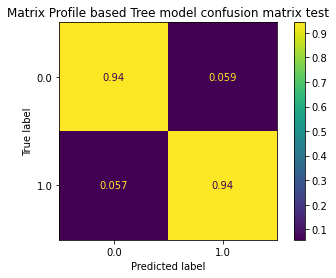

In [13]:
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')
plt.title(f'{MODEL} model confusion matrix test')
plt.savefig(f'conf_matrix_{MODEL}_test.png')
plt.show()


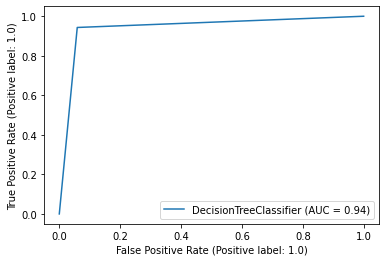

In [14]:
roc_auc = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()